[QMCPy]: https://qmcsoftware.github.io/QMCSoftware/ "Choi,  S.-C.  T.,  Hickernell,  F. J.,  McCourt,  M.  &  Sorokin,  A. A quasi-Monte  Carlo  Python  Library. https://qmcsoftware.github.io/QMCSoftware/. 2020."

[GAIL]: http://gailgithub.github.io/GAIL_Dev/ "Sou-Cheng T. Choi, Yuhan Ding, Fred J. Hickernell, Lan Jiang, Lluis Antoni Jimenez Rugama, Da Li, Jagadeeswaran Rathinavel, Xin Tong, Kan Zhang, Yizhi Zhang, and Xuan Zhou, GAIL: Guaranteed Automatic Integration Library (Version 2.3.1) [MATLAB Software], 2020. Available from `http://gailgithub.github.io/GAIL_Dev/`"

[NumPy]: https://pypi.org/project/numpy/ "Oliphant,  T. Guide  to  NumPy https://ecs.wgtn.ac.nz/foswiki/pub/Support/ManualPagesAndDocumentation/numpybook.pdf (TrelgolPublishing USA, 2006)."

[Scipy]: https://pypi.org/project/scipy/ "Pauli Virtanen, Ralf Gommers, Travis E. Oliphant, Matt Haberland, Tyler Reddy, David Cournapeau, Evgeni Burovski, Pearu Peterson, Warren Weckesser, Jonathan Bright, Stéfan J. van der Walt, Matthew Brett, Joshua Wilson, K. Jarrod Millman, Nikolay Mayorov, Andrew R. J. Nelson, Eric Jones, Robert Kern, Eric Larson, CJ Carey, İlhan Polat, Yu Feng, Eric W. Moore, Jake VanderPlas, Denis Laxalde, Josef Perktold, Robert Cimrman, Ian Henriksen, E.A. Quintero, Charles R Harris, Anne M. Archibald, Antônio H. Ribeiro, Fabian Pedregosa, Paul van Mulbregt, and SciPy 1.0 Contributors. (2020) SciPy 1.0: Fundamental Algorithms for Scientific Computing in Python. Nature Methods, in press."

[QRNG]: https://CRAN.R-project.org/package=qrng "Marius Hofert and Christiane Lemieux (2019). qrng: (Randomized) Quasi-Random Number Generators. R package version 0.0-7. `https://CRAN.R-project.org/package=qrng`."

[OwenHalton]: https://arxiv.org/abs/1706.02808 "Owen, A. B. 'A randomized Halton algorithm in R,' 2017. arXiv:1706.02808 [stat.CO]"

[MPS]: https://people.cs.kuleuven.be/~dirk.nuyens/qmc-generators/ "F. Y. Kuo and D. Nuyens. 'Application of quasi-Monte Carlo methods to elliptic PDEs with random diffusion coefficients - a survey of analysis and implementation,' Foundations of Computational Mathematics, 16(6):1631-1696, 2016. ([springer link](https://link.springer.com/article/10.1007/s10208-016-9329-5), [arxiv link](https://arxiv.org/abs/1606.06613))"

[CubMCML]: https://pubsonline.informs.org/doi/abs/10.1287/opre.1070.0496 "Giles, M. Multilevel Monte Carlo Path Simulation. Operations  Research 56,607–617 (June 2008)."

[CubQMCML]: https://www.semanticscholar.org/paper/Multilevel-quasi-Monte-Carlo-path-simulation-Giles-Waterhouse/25a9ca3aa216aa371d1be06fa9b93927187ee4ca "Giles,  M.  B.  &  Waterhouse,  B.  J.  Multilevel  quasi-Monte  Carlo  path  simulation. Advanced Financial  Modelling,  Radon  Series  on  Computational  and  Applied  Mathematics 8,165–181 (2009)."

[GilesSoftware]: http://people.maths.ox.ac.uk/~gilesm/mlmc/

[PyTorch]: https://pytorch.org

[LatticeBuilder]: http://simul.iro.umontreal.ca/latbuilder/ "L’Ecuyer, Pierre & Munger, David. (2015). LatticeBuilder: A General Software Tool for Constructing Rank-1 Lattice Rules. ACM Transactions on Mathematical Software. 42. 10.1145/2754929."

# Quasi-Monte Carlo (QMC) Software in QMCPy

This notebook is at http://tinyurl.com/QMCPyTutorial.  

A tutorial based on this notebook is at https://media.ed.ac.uk/playlist/dedicated/51612401/1_0z0wec2z/1_2k12mwiw.

As an example of available QMC software, we introduce the Python library [QMCPy][QMCPy].  This Jupyter notebook saves your typing.  **Make your own copy via** ``File/Save a copy in Drive`` **so you an run, *edit*, and follow along.**

QMCPy is a community effort.  This early release includes contributions from 

* Mike Giles [MLMC][CubMCML] and [MLQMC][CubQMCML] [software][GilesSoftware]
* Marius Hofert and Christiane Lemieux's [QRNG][QRNG]
* Pierre L'Ecuyer's [Lattice Builder][LatticeBuilder]
* Dirk Nuyens's [Magic Point Shop (MPS)][MPS]
* Art Owen's [Halton sequences][OwenHalton]
* [PyTorch][PyTorch]
* Guaranteed Automatic Integration Library [(GAIL)][GAIL]

and depends on the [NumPy][NumPy] and [SciPy][SciPy] Python packages.

View the companion pdf slides at https://speakerdeck.com/fjhickernell/quasi-monte-carlo-software and the introductory QMCPy blog at https://qmcpy.wordpress.com.



## Installation
QMCPy can be installed with ``pip install qmcpy`` or cloned from the  [QMCSoftware GitHub repository](https://github.com/QMCSoftware/QMCSoftware).  

In [1]:
import qmcpy  #we import the environment at the start to use it
import numpy as np  #basic numerical routines in Python
import time  #timing routines
import warnings  #to suppress warnings when needed
import torch  #only needed for PyTorch Sobol' backend
from torch.quasirandom import SobolEngine
from matplotlib import pyplot;  #plotting

pyplot.rc('font', size=16)  #set defaults so that the plots are readable
pyplot.rc('axes', titlesize=16)
pyplot.rc('axes', labelsize=16)
pyplot.rc('xtick', labelsize=16)
pyplot.rc('ytick', labelsize=16)
pyplot.rc('legend', fontsize=16)
pyplot.rc('figure', titlesize=16)

#a helpful plotting method to show increasing numbers of points
def plot_successive_points(distrib,ld_name,first_n=64,n_cols=1,pt_clr='bgkcmy',
                           xlim=[0,1],ylim=[0,1],coord1 = 0,coord2 = 1):
  fig,ax = pyplot.subplots(nrows=1,ncols=n_cols,figsize=(5*n_cols,5.5))
  if n_cols==1: ax = [ax]
  last_n = first_n*(2**n_cols)
  points = distrib.gen_samples(n=last_n)
  for i in range(n_cols):
    n = first_n
    nstart = 0
    for j in range(i+1):
      n = first_n*(2**j)
      ax[i].scatter(points[nstart:n,coord1],points[nstart:n,coord2],color=pt_clr[j])
      nstart = n
    ax[i].set_title('n = %d'%n)
    ax[i].set_xlim(xlim); ax[i].set_xticks(xlim); ax[i].set_xlabel('$x_{i,%d}$'%(coord1+1))
    ax[i].set_ylim(ylim); ax[i].set_yticks(ylim); ax[i].set_ylabel('$x_{i,%d}$'%(coord2+1))
    ax[i].set_aspect((xlim[1]-xlim[0])/(ylim[1]-ylim[0]))
  fig.suptitle('%s Points'%ld_name)
print('QMCPy Version',qmcpy.__version__)

QMCPy Version 1.0


## Generating low discrepancy (LD) points via a ``DiscreteDistribution`` object

We generate some points used for quasi-Monte Carlo methods.  These points are called low discrepancy (LD for short) and are created as an instance of a ``DiscreteDistribution`` class.

### Integration lattices

Here are some (randomly shifted) integration lattice points. This is a two step procees:  

i) construct the ``DiscreteDistribution`` object ``lattice``, and then 

ii) construct a number of points from the sequence.  

The structure of these points favors ``n`` that is a power of 2.


LD Lattice Points with shape (16, 2)
[[0.114 0.237]
 [0.614 0.737]
 [0.364 0.987]
 ...
 [0.802 0.8  ]
 [0.552 0.05 ]
 [0.052 0.55 ]]


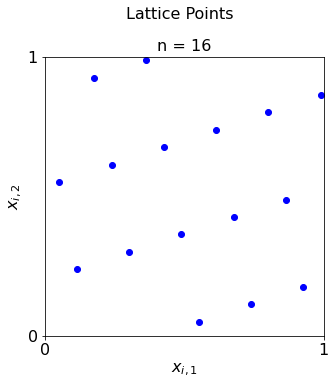

In [2]:
lattice = qmcpy.Lattice(dimension=2)  #define a discrete LD distribution based on an integration lattice
# print(lattice)  #print the properties of the lattice object
n = 16  #number of points to generate
points = lattice.gen_samples(n)  #construct some points
print(f'\nLD Lattice Points with shape {points.shape}\n'+str(points))  #these points have 15 significant digit precision but only three digits are shown
plot_successive_points(lattice,'Lattice',n)

Rerunning the commands above yields a different sequence of points because these points are _randomly shifted_ modulo 1.

We may also construct a subsequence of points in the middle of the sequence. Note that the points below match those above.

In [3]:
more_points = lattice.gen_samples(n_min=5,n_max=n)  #get more points
print('LD Lattice Points with shape',more_points.shape,'\n'+str(more_points))

LD Lattice Points with shape (11, 2) 
[[0.739 0.112]
 [0.489 0.362]
 [0.989 0.862]
 ...
 [0.802 0.8  ]
 [0.552 0.05 ]
 [0.052 0.55 ]]


Each $d$-dimensional point is _one row_ in the array.

As we increase the number of points, they fill $[0,1]^d$ evenly.  The next points are placed in between the existing points.  Here we illustrate with $d=2$.

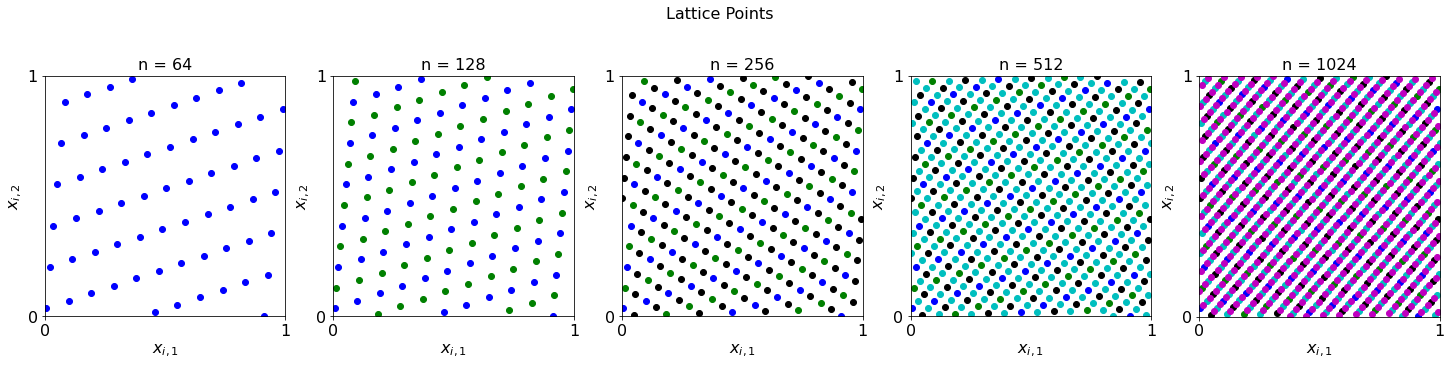

In [4]:
plot_successive_points(lattice,'Lattice',n_cols=5)

### IID uniform points do not fill space as well

Contrast this with independent and identically distributed (IID) points.  Although successive points fill the square, they do so without knowledge of the others and produce clusters and gaps.  Think of it this way

* LD = evenly spread
* IID = points do not know about each other

(Since the first parameter in the ``DiscreteDistribution`` object is the dimension, you need not identify it.)

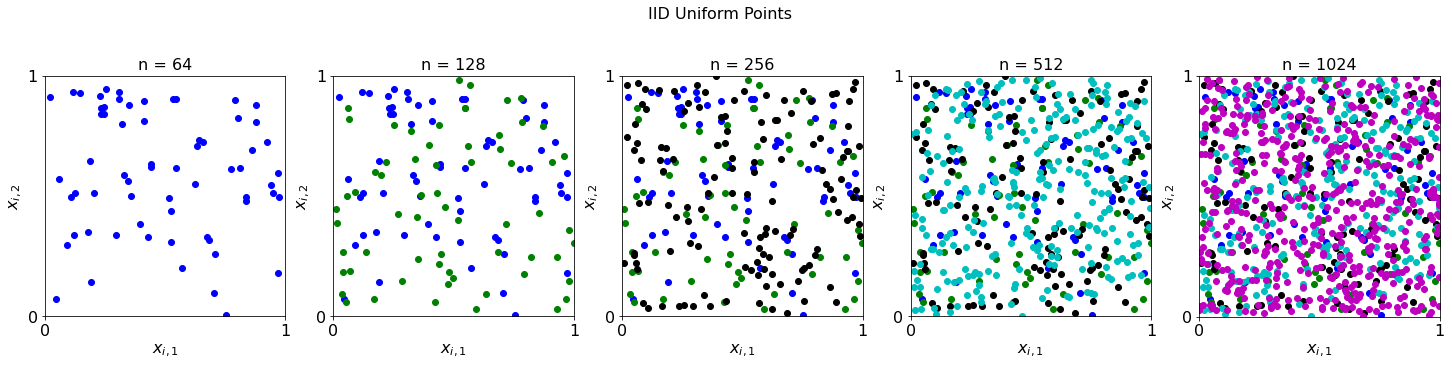

In [5]:
iid = qmcpy.IIDStdUniform(2)  #standard uniform IID random vector generator from NumPy
# print(iid)  #print the properties of iid
plot_successive_points(iid,'IID Uniform',n_cols=5)

### Rows and columns are _not_ interchangeable for LD

For LD sequences we must differentiate between the cooordinates of the point (column) and which point (row). The transpose of an LD array is _not_ LD.  This differs from IID multivariate points with IID marginals.

In the example below we reverse the roles of the rows and columns.  The transposed lattice points do not fill space at all, while the transposed IID points are as good as the originals.

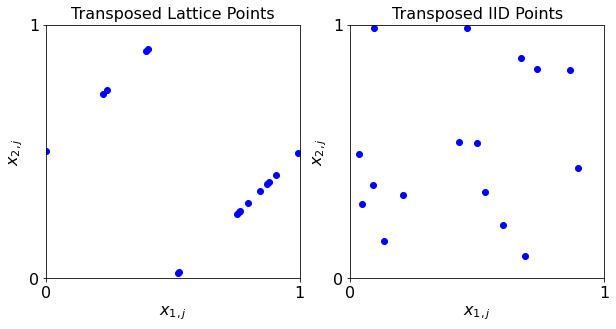

In [6]:
d = 16  #dimension
n = 2  #number of points
lattice = qmcpy.Lattice(d)  #define a discrete LD distribution based on an integration lattice
lattice_pts = lattice.gen_samples(n)  #the first parameter in the .gen_samples method is the number of points
iid = qmcpy.IIDStdUniform(d)
iid_pts = iid.gen_samples(n)
fig,ax = pyplot.subplots(nrows=1,ncols=2,figsize=(10,5.5))
ax[0].scatter(lattice_pts[0,0:d],lattice_pts[1,0:d],color='b')
ax[0].set_title('Transposed Lattice Points')
ax[1].scatter(iid_pts[0,0:d],iid_pts[1,0:d],color='b')
ax[1].set_title('Transposed IID Points')
for ii in range(2):
  ax[ii].set_xlim([0,1]); ax[ii].set_xticks([0,1]); ax[ii].set_xlabel('$x_{1,j}$')
  ax[ii].set_ylim([0,1]); ax[ii].set_yticks([0,1]); ax[ii].set_ylabel('$x_{2,j}$')
  ax[ii].set_aspect(1)

### Sobol' points

Another LD sequence is the Sobol' points.  Again, new points fill in the gaps between existing points. Since these are randomly digitally shifted Sobol' points, rerunning this command gives a different set of points.  For Sobol' points as well, ``n`` should normally be a power of 2.


LD Sobol' Points with shape (16, 2)
[[0.473 0.023]
 [0.928 0.786]
 [0.031 0.72 ]
 ...
 [0.781 0.685]
 [0.177 0.868]
 [0.723 0.074]]


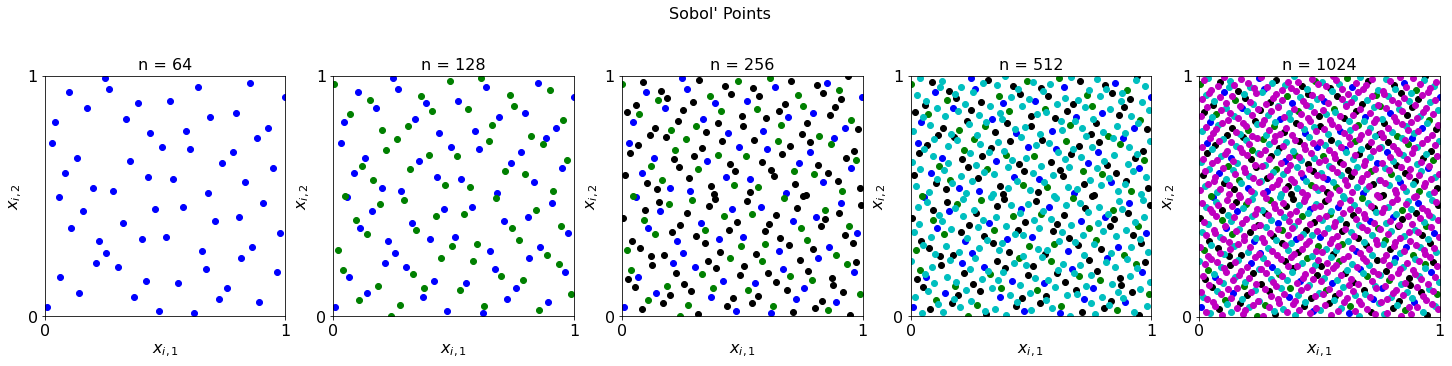

In [7]:
sobol = qmcpy.Sobol(2)  #Sobol LD generator
# print(sobol) #note below that the default is qrng from Hofert and Lemieux
points = sobol.gen_samples(16)
print(f'\nLD Sobol\' Points with shape {points.shape}\n'+str(points)) 
plot_successive_points(sobol,'Sobol\'',n_cols=5)

### Halton Points

A third kind of LD sequence is Halton points, which are also randomized. Again, new points fill in the gaps between existing points.  For Halton points there are no favored numbers of points.


LD Halton Points with shape (20, 2)
[[0.857 0.025]
 [0.357 0.358]
 [0.607 0.691]
 ...
 [0.325 0.95 ]
 [0.575 0.099]
 [0.075 0.432]]


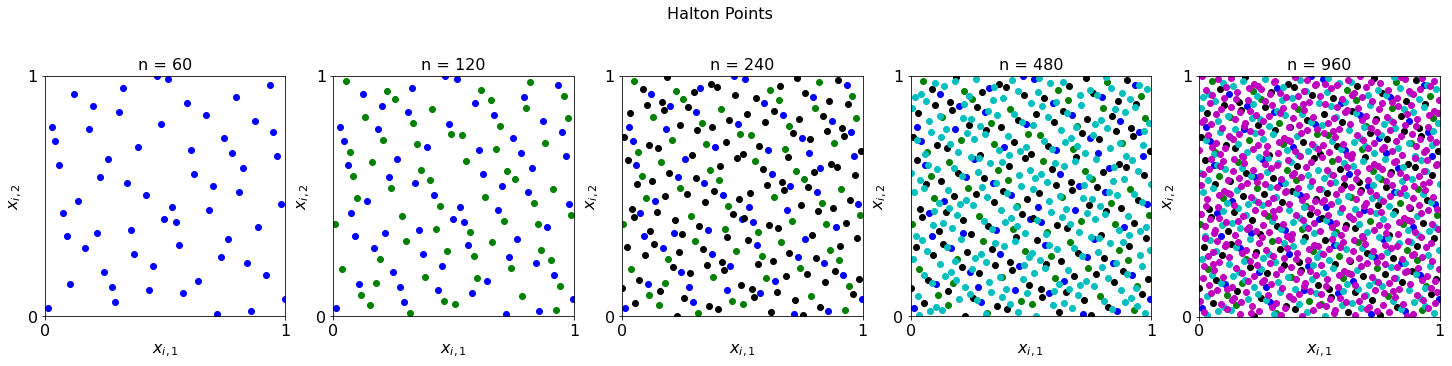

In [8]:
halton = qmcpy.Halton(2)
# print(halton)
points = halton.gen_samples(20)
print(f'\nLD Halton Points with shape {points.shape}\n'+str(points))
plot_successive_points(halton,'Halton',n_cols=5,first_n=60)

### Timing
The time to generate LD points depends on several factors, including the hardware and the particular generator.  One can generate one million points in 64 dimensions in a matter of seconds, somewhat slower than IID uniform points.  You may replace the ``DiscreteDistribution`` object in the first line of code below to test the timings of other kinds of points.  Halton seems to be the slowest (probably because the backend is implemented in Python rather than C).

In [9]:
ld = qmcpy.Sobol(64)  #define a discrete LD distribution
# print(ld)  #print the properties of the lattice object
start_time = time.time()  #time now
points = ld.gen_samples(2**20)  #construct some points
end_time = time.time()  #time after points are constructed
print(f'\nLD Points with shape {points.shape}\n'+str(points))
print(f'\nTime to construct points is %.1e seconds'%(end_time - start_time))

ld = qmcpy.Lattice(64)  #define a discrete LD distribution
# print(ld)  #print the properties of the lattice object
start_time = time.time()  #time now
points = ld.gen_samples(2**20)  #construct some points
end_time = time.time()  #time after points are constructed
print(f'\nLD Points with shape {points.shape}\n'+str(points))
print(f'\nTime to construct points is %.1e seconds'%(end_time - start_time))

ld = qmcpy.Halton(64)  #define a discrete LD distribution
# print(ld)  #print the properties of the lattice object
start_time = time.time()  #time now
points = ld.gen_samples(2**20)  #construct some points
end_time = time.time()  #time after points are constructed
print(f'\nLD Points with shape {points.shape}\n'+str(points))
print(f'\nTime to construct points is %.1e seconds'%(end_time - start_time))


LD Points with shape (1048576, 64)
[[0.996 0.697 0.751 ... 0.113 0.58  0.078]
 [0.449 0.086 0.29  ... 0.521 0.138 0.79 ]
 [0.581 0.442 0.083 ... 0.494 0.931 0.376]
 ...
 [0.288 0.432 0.26  ... 0.619 0.197 0.302]
 [0.687 0.04  0.115 ... 0.396 0.997 0.904]
 [0.141 0.68  0.592 ... 0.989 0.283 0.224]]

Time to construct points is 8.7e-01 seconds

LD Points with shape (1048576, 64)
[[0.205 0.791 0.602 ... 0.406 0.567 0.601]
 [0.705 0.291 0.102 ... 0.906 0.067 0.101]
 [0.455 0.541 0.352 ... 0.156 0.317 0.351]
 ...
 [0.955 0.867 0.404 ... 0.594 0.791 0.766]
 [0.705 0.117 0.654 ... 0.844 0.041 0.016]
 [0.205 0.617 0.154 ... 0.344 0.541 0.516]]

Time to construct points is 4.6e+00 seconds

LD Points with shape (1048576, 64)
[[0.751 0.579 0.999 ... 0.49  0.174 0.635]
 [0.251 0.912 0.599 ... 0.081 0.363 0.095]
 [0.501 0.245 0.199 ... 0.671 0.552 0.555]
 ...
 [0.499 0.925 0.646 ... 0.796 0.914 0.918]
 [0.749 0.258 0.246 ... 0.387 0.103 0.378]
 [0.249 0.369 0.99  ... 0.977 0.292 0.838]]

Time to c

### Transform LD sequences to mimic other distributions via a ``TrueMeasure`` object
LD sequences mimic $\mathcal{U}[0,1]^d$ by design.  If you want to mimic another distribution, LD points can be transformed accordingly.  This is done via a ``TrueMeasure`` object, which takes a ``DiscreteDistribution`` object as input. Choose the ``TrueMeasure`` according to the probability distribution that you wish to mimic, and input the LD ``DiscreteDistribution`` object that you wish to use.

#### Uniform on $[\boldsymbol{a},\boldsymbol{b}]$
An affine transformation can be used to turn $\mathcal{U}[0,1]^d$ points into $\mathcal{U}[\boldsymbol{a},\boldsymbol{b}]$ points.  The ``TrueMeasure`` object ``qmcpy.Uniform`` performs the transformation automatically.  Then we generate points as before, but now they mimic our new distribution.

Uniform (TrueMeasure Object)
    lower_bound     [-2  2]
    upper_bound     [2 4]

Uniform LD points with shape (256, 2)
[[-0.517  3.238]
 [ 0.495  2.074]
 [-1.608  2.639]
 ...
 [ 0.62   2.631]
 [-1.482  2.066]
 [ 1.505  3.246]]


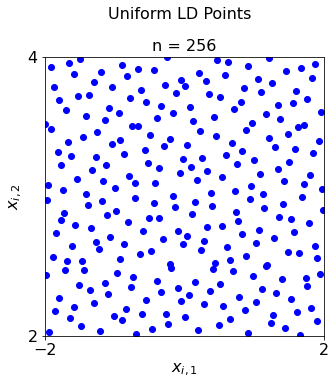

In [10]:
ld = qmcpy.Sobol(2)  #Sobol' points
another_unif_ld = qmcpy.Uniform(ld, lower_bound=[-2,2], upper_bound=[2,4])  #define the desired probability distribution with sobol as input
points = another_unif_ld.gen_samples(2**8) 
print(another_unif_ld)
print(f'\nUniform LD points with shape {points.shape}\n'+str(points))  #these points have 15 significant digit precision but only three digits are shown
plot_successive_points(another_unif_ld,'Uniform LD',first_n=2**8,xlim=[-2,2],ylim=[2,4])

#### Gaussian

A similar process can be followed for constructing points that mimic a multivariate Gaussian distribution. The transformation used here assigns the directions with the larger variance to the lower numbered coordinates of the LD sequence via principal component analysis (PCA) or equivalently an eigvenvector-eigenvalue decomposition of the covariance matrix.  This takes advantage of the fact that the lower numbered coordinates of an LD sequence tend to have better evenness.

Gaussian (TrueMeasure Object)
    mean            [3 2]
    covariance      [[9 5]
                    [5 4]]
    decomp_type     pca

Gaussian LD Points with shape (256, 2)
[[ 0.957 -0.496]
 [ 4.294  3.189]
 [ 7.749  4.609]
 ...
 [ 2.674  1.597]
 [ 4.963  2.181]
 [ 0.215  0.799]]


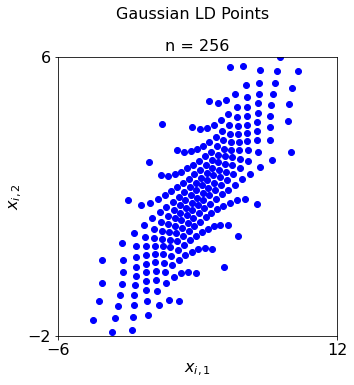

In [11]:
ld = qmcpy.Lattice(2)
gaussian_ld = qmcpy.Gaussian(ld, mean=[3,2], covariance=[[9,5], [5,4]])  #specify the desired mean and covariance of your multivariate Gaussian distribution
points = gaussian_ld.gen_samples(2**8)
print(gaussian_ld)
print(f'\nGaussian LD Points with shape {points.shape}\n'+str(points))  #these points have 15 significant digit precision but only three digits are shown
plot_successive_points(gaussian_ld,'Gaussian LD',first_n=2**8,xlim=[-6,12],ylim=[-2,6])

[TransformedLD]: https://arxiv.org/abs/2004.09887 "Li, Y., Kang, L., and  Hickernell,  F. J. Is a Transformed Low Discrepancy Design Also Low Discrepancy? in Contemporary Experimental Design, Multivariate Analysis and Data Mining, Festschrift in Honour of Professor Kai-Tai Fang (J. Fan and J. Pan, eds.), p. 69–92, 2020."

Transformations of low discrepancy sequences often have good properties, but may not be low discrepancy themselves, depending on your definition of discrepancy as shown by [Yiou Li and Lulu Kang][TransformedLD].

**_Pause for questions_**

## Integration

[Kesiter]: https://aip.scitation.org/doi/pdf/10.1063/1.168565 "Keister, B. D. Multidimensional Quadrature Algorithms. Computers in Physics 10, 119–122 (1996)."

Cubature—the approximation of multivariate integrals—is an important application area for QMC. To solve this problem we need the ``Integrand`` and ``StoppingCriterion`` classes.

Consider the followng $d$-variate integral due to [Keister][Kesiter]:
\begin{equation*}
\mu = \int_{\mathbb{R}^d} \cos(\lVert\boldsymbol{t}\rVert) \exp( - \lVert \boldsymbol{t} \rVert^2) \,  \mathrm{d} \boldsymbol{t},
\end{equation*}
where $\lVert \cdot \rVert$ is the Euclidean norm.  To approximate this integral via (Q)MC methods, it needs to be written as the integral with respect to a probability measure, e.g., 
\begin{equation*}
\mu = \int_{\mathbb{R}^d} \underbrace{\pi^{d/2} \cos(\lVert\boldsymbol{t}\rVert)}_{g(\boldsymbol{t})} \; \underbrace{\pi^{-d/2} \exp( - \lVert \boldsymbol{t} \rVert^2) \,  \mathrm{d} \boldsymbol{t}}_{\mathcal{N}(\boldsymbol{0}_d,\mathsf{I}_d/2) \text{ measure}}.
\end{equation*}
Using transformation techniques highlighted above, this integral can be further transformed to an integral over the unit cube, which is suitable for certain stopping criteria:
\begin{equation*}
\mu = \int_{[0,1]^d} \underbrace{\pi^{d/2}  \cos\left(\sqrt{ \frac 12 \sum_{j=1}^d \bigl[\Phi^{-1}(x_j)\bigr]^2}\right)}_{f(\boldsymbol{x})}  \, \rm d \boldsymbol{x}. 
\end{equation*}

Although it may seem counter-intuitive, we set up our numerical problem by

* first choosing the ``DiscreteDistribution`` object, 
* next the ``TrueMeasure`` object, 
* thirdly choosing ``Integrand`` object, and 
* finally the ``StoppingCriterion`` object.

In [12]:
d = 5  #coded as parameters so that 
tol = 1e-3  #you can change here and propagate them through this example
lattice = qmcpy.Lattice(d)
gaussian_lattice = qmcpy.Gaussian(lattice, mean = 0, covariance = 1/2)  #mean and covariance of the distribution identified above

### ``Integrand`` objects

The ``TrueMeasure`` object becomes input to an ``Integrand`` object, which transforms our original integrand, $g$, to our eventual integrand, $f$.  This transformation relies on the ``TrueMeasure`` object along with its corresponding ``DiscreteDistribution`` object.  The object ``qmcpy.Keister`` has already been coded as a use case in ``qmcpy``.

In [13]:
keister = qmcpy.Keister(gaussian_lattice) #transform the original integrand to the eventual one

### ``StoppingCriterion`` objects and the ``integrate`` method

[CubQMCLatticeG]: https://arxiv.org/abs/1411.1966 "Jiménez Rugama, Ll. A. & Hickernell, F. J. Adaptive  Multidimensional  Integration  Based  on  Rank-1  Lattices in Monte  Carlo  and  Quasi-Monte  Carlo Methods: MCQMC, Leuven, Belgium, April 2014 (eds Cools, R. & Nuyens,D.) 163.arXiv:1411.1966 (Springer-Verlag, Berlin, 2016), 407–422."

Determining the sample size needed requires a stopping criterion, which typically depends on the error tolerance, ``abs_tol``.  The stopping criterion attempts to produce the answer satisfying the error tolerance with not much more work than is truly needed. There are several ``StoppingCriterion`` objects available, but they tend to work for specific LD sequences.  This one comes from [Tony Jiménez Rugama][CubQMCLatticeG].  It takes as its input the ``Integrand`` object, which carries information about the ``TrueMeasure`` object and its ``DiscreteDistribution`` object. 

In [14]:
keister_lattice_gauss_g = qmcpy.CubQMCLatticeG(keister, abs_tol = tol)  #using Tony's stopping criterion

Invoking the ``integrate`` method returns the numerical solution and a data object. Printing the data object provides a neat summary of the integration problem. For details of the output fields, see the online, searchable QMCPy Documentation at [https://qmcpy.readthedocs.io/](https://qmcpy.readthedocs.io/en/latest/algorithms.html#module-qmcpy.integrand.keister).

In [15]:
solution, data = keister_lattice_gauss_g.integrate()
print(solution)

1.1345703229471948


#### Fixed sample budget computation

If you are not concerned about meeting an error tolerance but can only afford ``n_max`` function values, then you can set an ``abs_tol`` small enough and set ``n_max`` to your desired sample size.  You will get an error bound. 

In [16]:
warnings.simplefilter("ignore")
keister_lattice_gauss_g_small_n = qmcpy.CubQMCLatticeG(keister, abs_tol = 1e-6, n_max = 2**12)  #the default n_max is 2**35
solution, data = keister_lattice_gauss_g_small_n.integrate()
print(solution)

1.1391054261991376


#### QMC is much faster than MC. (Q)MC cost is mostly dimension dependent

Run this next code block to see how the run time and the number of function evaluations increase as the tolerance decreases. QMC using LD sequences uses much less time and much fewer function values than MC using IID sequences. 

Tensor product rules have a time or function value cost that is $\mathcal{O}(\varepsilon^{-d/r})$, where $\varepsilon$ is the error tolerance and $r$ is bounded above by both the smoothness of the integrand and the quality of the algorithm.  Such rules have a _curse of dimensionality_ because their cost blows up exponentially with dimension.

Unlike tensor product cubature rules, the cost of (Q)MC cubature is essentially dimension independent: $\mathcal{O}(\varepsilon^{-2})$ for IID MC and typically $\mathcal{O}(\varepsilon^{-1-\delta})$ for QMC.  Although Q(MC) is not particularly fast, its performance usually does not degrade as the number of variables of in the integrand increases.


Keister integral = 1.1606437750111196



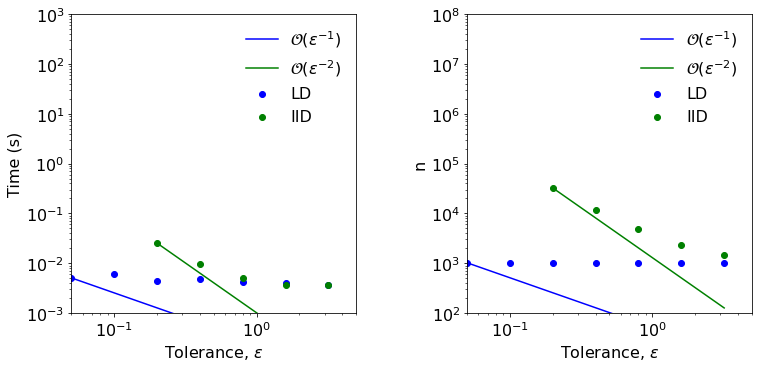

In [17]:
d = 5; tol = 5e-2  #re-construct the example
#d = 7; tol = 3e-3  #if you change the dimension
#d = 10; tol = 3e-2  #you may also wish to change the tolerance, since the value of the integral changes
ld_keister = qmcpy.Keister(qmcpy.Gaussian(qmcpy.Lattice(d), mean = 0, covariance = 1/2))  #mean and covariance of the distribution identified above
iid_keister =  qmcpy.Keister(qmcpy.Gaussian(qmcpy.IIDStdGaussian(d), mean = 0, covariance = 1/2))

n_tol = 7
ii_iid = 2  #make this larger to reduce the time required
tol_vec = [tol*(2**ii) for ii in range(n_tol)]  #initialize
ld_time = [0]*n_tol; ld_n = [0]*n_tol  #low discrepancy time and number of function values
iid_time = [0]*n_tol; iid_n = [0]*n_tol  #IID time and number of function values
for ii in range(n_tol):
  solution, data = qmcpy.CubQMCLatticeG(ld_keister, abs_tol = tol_vec[ii]).integrate()
  if ii == 0: 
    print(f'\nKeister integral = {solution}\n')
  ld_time[ii] = data.time_integrate
  ld_n[ii] = data.n_total
  if ii >= ii_iid:
    solution, data = qmcpy.CubMCG(iid_keister, abs_tol = tol_vec[ii]).integrate()
    iid_time[ii] = data.time_integrate
    iid_n[ii] = data.n_total
fig,ax = pyplot.subplots(nrows=1,ncols=2,figsize=(13,5.5))
ax[0].scatter(tol_vec[0:n_tol],ld_time[0:n_tol],color='b'); 
ax[0].plot(tol_vec[0:n_tol],[(ld_time[0]*tol_vec[0])/tol_vec[jj] for jj in range(n_tol)],color='b')
ax[0].scatter(tol_vec[ii_iid:n_tol],iid_time[ii_iid:n_tol],color='g'); 
ax[0].plot(tol_vec[ii_iid:n_tol],[(iid_time[ii_iid]*(tol_vec[ii_iid]**2))/(tol_vec[jj]**2) for jj in range(ii_iid,n_tol)],color='g')
ax[0].set_ylim([0.001,1000]); ax[0].set_ylabel('Time (s)')
ax[1].scatter(tol_vec[0:n_tol],ld_n[0:n_tol],color='b'); 
ax[1].plot(tol_vec[0:n_tol],[(ld_n[0]*tol_vec[0])/tol_vec[jj] for jj in range(n_tol)],color='b')
ax[1].scatter(tol_vec[ii_iid:n_tol],iid_n[ii_iid:n_tol],color='g'); 
ax[1].plot(tol_vec[ii_iid:n_tol],[(iid_n[ii_iid]*(tol_vec[ii_iid]**2))/(tol_vec[jj]**2) for jj in range(ii_iid,n_tol)],color='g')
ax[1].set_ylim([1e2,1e8]); ax[1].set_ylabel('n')
for ii in range(2):
  ax[ii].set_xlim([tol,100*tol]); ax[ii].set_xlabel('Tolerance, '+r'$\varepsilon$')
  ax[ii].set_xscale('log'); ax[ii].set_yscale('log')
  ax[ii].legend([r'$\mathcal{O}(\varepsilon^{-1})$',r'$\mathcal{O}(\varepsilon^{-2})$','LD','IID'],frameon=False)
  ax[ii].set_aspect(0.35)

### Alternatives for ``StoppingCriterion``

Other ``StoppingCriterion`` objects are available.  Most are tied to particular ``DiscreteDistribution`` objects.  For LD points one can use replications and the Central Limit Theorem (CLT).

In [18]:
keister_lattice_gauss_CLT = qmcpy.CubQMCCLT(keister, abs_tol = tol)  #using a CLT stopping criterion with random replications
solution, data = keister_lattice_gauss_CLT.integrate()
print(solution)

1.1304202592568107


This answer agrees with the one above.

### Alternatives for ``TrueMeasure``

The Keister integrand may also be solved using a Lebesgue ``TrueMeasure`` object:
$$\mu = \int_{\mathbb{R}^d} \underbrace{\cos(\lVert\boldsymbol{t}\rVert) \exp( - \lVert\boldsymbol{t}\rVert^2)}_{g(\boldsymbol{t})} \,  \underbrace{\mathrm{d} \boldsymbol{t}}_{\text{Lebesgue measure}}$$
The ``TrueMeasure`` object contains the appropriate information so that the ``Integrand`` object can obtain the correct eventual integrand, $f$, in terms of the original integrand, $g$.  

Since ``TrueMeasure`` is not a probability measure, so it cannot be mimicked, but it can be used to solve the integration problem.  The ``Integrand`` object maps the problem using an affine transformation for finite boxes and an inverse normal distribution function transformation for $\mathbb{R}^d$.

The code below also shows how to take our own integrand defined with a simple input and output, and turn it into a ``qmcpy`` ready integrand using the ``qmcpy.CustomFun`` object.

In [19]:
def my_Keister(x):  #this could be a functional of a solution to a PDE with random coefficients
                    #or anything that you would like
    """  
    x: nxd numpy ndarray
       n samples
       d dimensions

    returns n-vector of the Kesiter function
    evaluated at the n input samples
    """
    d = x.shape[1]
    norm = np.sqrt((x**2).sum(1))
    k = np.cos(norm)*np.exp(-norm**2)
    return k  #size n vector

ld = qmcpy.Sobol(d)  #choose the LD points
lebesgue = qmcpy.Lebesgue(qmcpy.Gaussian(ld))  #now choose the Lebesgue distribution
f = qmcpy.CustomFun(lebesgue, g=my_Keister)
keister_lebesgue_ld_g = qmcpy.CubQMCSobolG(f, abs_tol = tol)  #the stopping criterion does need to match the LD points
solution, data = keister_lebesgue_ld_g.integrate()
print(solution)

1.1000351185502417


This answer agrees with the answers above for the same integration problem.

The initial ``DiscreteDistribution`` does not need to mimic the standard uniform distribution as this next example shows.

In [20]:
iid = qmcpy.IIDStdGaussian(d)  #choose the LD points
lebesgue = qmcpy.Lebesgue(qmcpy.Gaussian(iid))  #now choose the Lebesgue distribution
f = qmcpy.CustomFun(lebesgue, g=my_Keister)
keister_lebesgue_ld_g = qmcpy.CubMCCLT(f, abs_tol = 10*tol)  #the stopping criterion does need to match the points
solution, data = keister_lebesgue_ld_g.integrate()
print(solution)

0.8794500514510044


### Multi-level (Q)MC

When the dimesion of the multivariate integral is high, multi-level (Quasi-)Monte Carlo (ML(Q)MC) methods may save computation time.  The cost of one integrand value depends on the number of input variables, $d$, which corresponds to the dimension of our integration problem.  ML(Q)MC methods allow us attain our accuracy requirements by evaluating low dimensional integrands many times and high dimensional integrands much fewer times.

High or infinte dimesional integration problems arise when computing the  expectations of quantities coming stochastic differential equations (SDEs).  These problems arise in finance applications. The dimension of the integrand typically refers to the number of time steps used to discretize the SDE.

Here are some parameters for the Asian option examples below.  Changing them here allows you to compare the run times of these examples in a fair way.

In [21]:
abs_tol = .05  #a nickel
n_time_steps = 64  #being a power of 2 will help for multi-level

options = {  #there should be nothing magic about these choices
    'interest_rate': .05,
    'volatility': .5,
    'start_price': 30,
    'strike_price': 30
}

giles_options = {  #Giles's option examples have a bit different parameters
    'interest_rate': .05,
    'volatility': .5,
    'start_strike_price': 30,
    'option': 'asian'
}

#### Single Level MC

The vanilla way to solve this problem is IID Monte Carlo.  The fair price of the option is an expectation or integral, and the dimension is the number of time steps of used to discretize the Brownian motion that drives the SDE describing the price of the underlying asset.  The number of time steps should be fairly large.

[CubMCG]: https://arxiv.org/abs/1208.4318 "Fred J. Hickernell, Lan Jiang, Yuewei Liu, and Art B. Owen, 'Guaranteed conservative fixed width confidence intervals via Monte Carlo sampling,' Monte Carlo and Quasi-Monte Carlo Methods 2012 (J. Dick, F.Y. Kuo, G. W. Peters, and I. H. Sloan, eds.), pp. 105-128, Springer-Verlag, Berlin, 2014. DOI: 10.1007/978-3-642-41095-6_5"

[This paper by Lan Jiang and collaborators][CubMCG] describes the stopping criterion. 

In [22]:
iidBrownian = qmcpy.BrownianMotion(qmcpy.IIDStdGaussian(n_time_steps))
payoff = qmcpy.AsianOption(iidBrownian, **options)
IIDstop = qmcpy.CubMCG(payoff,abs_tol=abs_tol)
price,data = IIDstop.integrate()
print(data)

Solution: 3.7203         
AsianOption (Integrand Object)
    volatility      2^(-1)
    call_put        call
    start_price     30
    strike_price    30
    interest_rate   0.050
    mean_type       arithmetic
    dimensions      2^(6)
    dim_fracs       0
IIDStdGaussian (DiscreteDistribution Object)
    d               2^(6)
    seed            310678
    mimics          StdGaussian
BrownianMotion (TrueMeasure Object)
    time_vec        [0.016 0.031 0.047 ... 0.969 0.984 1.   ]
    drift           0
    mean            [0. 0. 0. ... 0. 0. 0.]
    covariance      [[0.016 0.016 0.016 ... 0.016 0.016 0.016]
                    [0.016 0.031 0.031 ... 0.031 0.031 0.031]
                    [0.016 0.031 0.047 ... 0.047 0.047 0.047]
                    ...
                    [0.016 0.031 0.047 ... 0.969 0.969 0.969]
                    [0.016 0.031 0.047 ... 0.969 0.984 0.984]
                    [0.016 0.031 0.047 ... 0.969 0.984 1.   ]]
    decomp_type     pca
    transform       Brow

#### Fixed Multilevel IID MC with CLT

Multilevel MC writes the high dimensional integral, $\mu$, as a sum of a low dimensional integral, $\mu_{d_1}$, plus a little higher dimensional integral, $\mu_{d_2}$, and so on:  
$$
\mu = \mu_{d_1} + \mu_{d_2} + \cdots + \mu_{d_L}, \qquad d_1 < d_2 < \cdots
$$
Done well, $\mu_{d_1}$ takes many integrand values to approximate well, but each $d_1$-dimensional integrand value is cheap, while $\mu_{d_L}$ requires few integrand values to approximate well, but each $d_L$-dimensional integrand value is expensive.

Here is ML IID MC using a CLT stopping criterion.  The $d_1, \ldots, d_L$ are all fixed.

In [ ]:
iidBrownian = qmcpy.BrownianMotion(qmcpy.IIDStdGaussian())
payoff = qmcpy.AsianOption(iidBrownian, **options, multi_level_dimensions=[4,16,64])
iid_ML_stop = qmcpy.CubMCCLT(payoff,abs_tol=abs_tol)
price,data = iid_ML_stop.integrate()
print(data)

#### Adaptive Multilevel MC from Mike Giles

[CubMCML]: https://pubsonline.informs.org/doi/abs/10.1287/opre.1070.0496 "Giles, M. Multilevel Monte Carlo Path Simulation. Operations  Research 56,607–617 (June 2008)."

[GilesSoftware]: http://people.maths.ox.ac.uk/~gilesm/mlmc/

Mike Giles and his collaborators have developed several ML(Q)MC algorithms.   The ML IID MC algorithm and stopping criterion implemented here are from [this paper][CubMCML] and [this code][GilesSoftware]. The answer is expected to be different than above, even with the same parameters, as the `MLCallOptions` uses a different discretization. The algorithm considers the SDE for logarithm of the stock price, which allows exact time stepping for constant interest rates and volatirilities, while Giles uses a Milstein discretization for the SDE for the stock price iteself.

In [ ]:
iidBrownian = qmcpy.Gaussian(qmcpy.IIDStdGaussian())
payoff = qmcpy.MLCallOptions(iidBrownian, **giles_options)
giles_MLMC_stop = qmcpy.CubMCML(payoff,abs_tol=abs_tol)
solution,data = giles_MLMC_stop.integrate()
print(data)

#### Single Level QMC Baseline

[CubQMCSobolG]: https://arxiv.org/abs/1410.8615 "Fred J. Hickernell and Lluis Antoni Jimenez Rugama, 'Reliable adaptive cubature using digital sequences,' Monte Carlo and Quasi-Monte Carlo Methods: MCQMC, Leuven, Belgium, April 2014 (R. Cools and D. Nuyens, eds.), Springer Proceedings in Mathematics and Statistics, vol. 163, Springer-Verlag, Berlin, 2016, arXiv:1410.8615 [math.NA], pp. 367-383."

Tony Jiménez's stopping criterion for cubature via Sobol' sequences in  [this paper][CubQMCSobolG] does not yet work for multi-level problems.  Here it is treating the option pricing problem as a high dimensional integral.

In [ ]:
sobol_brownian = qmcpy.BrownianMotion(qmcpy.Sobol(n_time_steps))
integrand = qmcpy.AsianOption(sobol_brownian, **options)
stopping_criterion = qmcpy.CubQMCSobolG(integrand,abs_tol = abs_tol)
solution,data = stopping_criterion.integrate()
print(data)

### Importance Sampling

For the option pricing problem, we may add a drift to the Brownian motion as an example of importance sampling.

First, we need to change our problem to one for which importance sampling can show some benefit.  We consider an out-of-the-money call option.

In [ ]:
abs_tol = .001
n_time_steps = 64

options = {
    'interest_rate': .05,
    'volatility': .5,
    'start_price': 30,
    'strike_price': 40  #a larger strike price than before
}

First we price it as above using single level QMC.

In [ ]:
sobol_brownian = qmcpy.BrownianMotion(qmcpy.Sobol(n_time_steps))
integrand = qmcpy.AsianOption(sobol_brownian, **options)
stopping_criterion = qmcpy.CubQMCSobolG(integrand,abs_tol = abs_tol)
solution,data = stopping_criterion.integrate()
print(data)

Next, we introduce an upward drift in the Brownian motion, which produces more stock price paths with positive payoffs.  This produces a smaller varation in the integrand and a generally faster run time.  (There still remains the question of how to automatically choose an optimal drift.)

In [ ]:
sobol_drift_brownian = qmcpy.BrownianMotion(qmcpy.Sobol(n_time_steps), drift = 0.5)
integrand = qmcpy.AsianOption(sobol_drift_brownian, **options)
stopping_criterion = qmcpy.CubQMCSobolG(integrand,abs_tol = abs_tol)
solution,data = stopping_criterion.integrate()
print(data)

**_Pause for questions_**

## Under the hood

The structure of ``qmcpy`` is that there are five major classes:

* ``DiscreteDistribution`` used to generate LD sequences, primarily on $[0,1]^d$
* ``TrueMeasure`` for using these LD sequences to mimic other distributions and to define integrals with respect to other measures
* ``Integrand`` to define the integrand for the multivariate integration problems
* ``StoppingCriterion`` to determine when the desired accuracy has been reached
* ``AccumulateData`` the invisible class used to keep track of important data as you continue to sample

We look at some of the important parameters that the corresponding objects have.

[GAIL]: http://gailgithub.github.io/GAIL_Dev/ "Sou-Cheng T. Choi, Yuhan Ding, Fred J. Hickernell, Lan Jiang, Lluis Antoni Jimenez Rugama, Da Li, Jagadeeswaran Rathinavel, Xin Tong, Kan Zhang, Yizhi Zhang, and Xuan Zhou, GAIL: Guaranteed Automatic Integration Library (Version 2.3.1) [MATLAB Software], 2020. Available from `http://gailgithub.github.io/GAIL_Dev/`"

[QRNG]: https://CRAN.R-project.org/package=qrng "Marius Hofert and Christiane Lemieux (2019). qrng: (Randomized) Quasi-Random Number Generators. R package version 0.0-7. `https://CRAN.R-project.org/package=qrng`."

[OwenHalton]: https://arxiv.org/abs/1706.02808 "Owen, A. B. 'A randomized Halton algorithm in R,' 2017. arXiv:1706.02808 [stat.CO]"

[MPS]: https://people.cs.kuleuven.be/~dirk.nuyens/qmc-generators/ "F. Y. Kuo and D. Nuyens. 'Application of quasi-Monte Carlo methods to elliptic PDEs with random diffusion coefficients - a survey of analysis and implementation,' Foundations of Computational Mathematics, 16(6):1631-1696, 2016. ([springer link](https://link.springer.com/article/10.1007/s10208-016-9329-5), [arxiv link](https://arxiv.org/abs/1606.06613))"

[GilesSoftware]: http://people.maths.ox.ac.uk/~gilesm/mlmc/

[PyTorch]: https://pytorch.org

[LatticeBuilder]: http://simul.iro.umontreal.ca/latbuilder/

### LD sequence generators

The LD generators (``DiscreteDistribution`` objects) implemented here are drawn from several sources, which are denoted ``backend`` (first listed is the default):
- Sobol: [QRNG], [MPS], & [PyTorch]
- Lattice: [GAIL] & [MPS], with default generating vectors from [Lattice Builder][LatticeBuilder]
- Halton: [Art Owen's][OwenHalton] & [QRNG]
- Korobov: [QRNG]

We illustrate some of the features of these varous backends and some of the other parameters that you can set.

#### Different lattice backends and generators

The ``qmcpy.Lattice`` generator using the GAIL and MPS ``backends`` with the same generating vectors yield the same points but in a different order.  The ``stopping criterion`` ``qmcpy.CubLatticeG`` requires the GAIL order, but not all stopping criteria do.

In [ ]:
d=4; n=8
x_gail = qmcpy.Lattice(d,order='linear',randomize=False).gen_samples(n,warn=False)
print('GAIL Samples')
for i in range(n): print(x_gail[i])
x_mps = qmcpy.Lattice(d,order='natural',randomize=False).gen_samples(n,warn=False)
print('\n\nMPS Samples')
for i in range(n): print(x_mps[i])
fig,ax = pyplot.subplots(nrows=1,ncols=2,figsize=(10,5.5))
ax[0].scatter(x_gail[0:n,0],x_gail[0:n,1],color='b')
ax[0].set_title('GAIL backend')
ax[1].scatter(x_mps[0:n,0],x_mps[0:n,1],color='b')
ax[1].set_title('MPS backend')
for ii in range(2):
  ax[ii].set_xlim([0,1]); ax[ii].set_xticks([0,1]); ax[ii].set_xlabel('$x_{i,1}$')
  ax[ii].set_ylim([0,1]); ax[ii].set_yticks([0,1]); ax[ii].set_ylabel('$x_{i,2}$')
  ax[ii].set_aspect(1)

#### Default LDs are randomized

LDs can be purely deterministic or they can be randomized.  For lattices this corresponds to a random shift modulo one.  For Sobol' sequences this corresponds to a random digital shift.  (PyTorch also uses random linear scrambling.)

This randomization is turned on by default, but can also be turned off. With randomization off, the points will always look the same. Below the first sequence of points is randomized and so is different every time the code is run.  The second sequence is not randomized and stay the same.

Turning off randomization throws a warning, which stops execution in Colab so we disable the warnings.

In [ ]:
warnings.simplefilter('ignore')  #turn off warnings which stop execution in Colab
n = 16
ldA = qmcpy.Lattice(2)
ldB = qmcpy.Lattice(2, randomize = False)
pointsA = ldA.gen_samples(n)  #construct some points
pointsB = ldB.gen_samples(n)  #construct some points
print(f'\nRandomized LD Points with shape {pointsA.shape}\n'+str(pointsA))  #these points have 15 significant digit precision but only three digits are shown
print(f'\nNonrandomized LD Points with shape {pointsB.shape}\n'+str(pointsB))  #these points have 15 significant digit precision but only three digits are shown
fig,ax = pyplot.subplots(nrows=1,ncols=2,figsize=(10,5.5))
ax[0].scatter(pointsA[0:n,0],pointsA[0:n,1],color='b')
ax[1].scatter(pointsB[0:n,0],pointsB[0:n,1],color='b')
for ii in range(2):
   ax[ii].set_xlim([0,1]); ax[ii].set_xticks([0,1]); ax[ii].set_xlabel('$x_{i,1}$')
   ax[ii].set_ylim([0,1]); ax[ii].set_yticks([0,1]); ax[ii].set_ylabel('$x_{i,2}$')
   ax[ii].set_aspect(1)

#### Unrandomized LDs start with $\boldsymbol{0}$

By definition, without randomization the first point in all the popluar LD sequences is the origin.  You can try.

In [ ]:
warnings.simplefilter('ignore')  #turn off warnings which stop execution in Colab
ld = qmcpy.Lattice(6,randomize=False)
points = ld.gen_samples(4)  #construct some points
print(f'\nLD Points with shape {points.shape}\n'+str(points))  #these points have 15 significant digit precision but only three digits are shown

#### Coordinate values of zero and one may be problemetic if transformed to $\mathbb{R}^d$

If a coordinate value of a point constructed on $[0,1]^d$ is zero or one, then then $0$ is mapped to $-\infty$ and $1$ is mapped to $\infty$ when these points are transformed to $\mathbb{R}^d$, as is done when solving problems with Gaussian distributions. In Python, these may turn out to be ``nan``.  For many applications, infinities or ``nan`` will be troublesome.

In [ ]:
warnings.simplefilter('ignore')  #turn off warnings which stop execution in Colab
ld = qmcpy.Lattice(6,randomize=False)
unif_points = ld.gen_samples(2)  #construct some points
print(f'\nLD Points with shape {unif_points.shape}\n'+str(unif_points))
ld_gauss = qmcpy.Gaussian(ld)
gauss_points = ld_gauss.gen_samples(2)
print(f'\nLD Points with shape {gauss_points.shape}\n'+str(gauss_points))

#### Replications with a fixed seed

For debugging purposes, you may wish to fix the seed of your randomized points.  This gives the advantage of an unchanging answer while avoiding the boundaries of the unit cube.  When rerunning the code below, the answers are unchanged iff the seed is fixed. For Tony's stopping criterion from GAIL, the points are randomized, but the algorithm is deterministic. For the fixed-multilevel CLT stopping criterion, the points and the algorithm are both random.

In [ ]:
solution_G_fixed = qmcpy.CubQMCSobolG(qmcpy.Keister(qmcpy.Gaussian(qmcpy.Sobol(2,seed=47),covariance=1/2))).integrate()[0]
solution_CLT_fixed = qmcpy.CubQMCCLT(qmcpy.Keister(qmcpy.Gaussian(qmcpy.Sobol(2,seed=47),covariance=1/2))).integrate()[0]
solution_G = qmcpy.CubQMCSobolG(qmcpy.Keister(qmcpy.Gaussian(qmcpy.Sobol(2),covariance=1/2))).integrate()[0]
solution_CLT = qmcpy.CubQMCCLT(qmcpy.Keister(qmcpy.Gaussian(qmcpy.Sobol(2),covariance=1/2))).integrate()[0]
print(f'Solution for GAIL stopping criterion with FIXED seed {solution_G_fixed}')
print(f'Solution for CLT stopping criterion with FIXED seed {solution_CLT_fixed}')
print(f'Solution for GAIL stopping criterion {solution_G}')
print(f'Solution for CLT stopping criterion {solution_CLT}')

#### Help

You can obtain help on any object by the ``help(...)`` or ``dir(...)`` commands.

In [ ]:
help(qmcpy.Sobol)
dir(qmcpy.Sobol)

### Stopping criteria

[GAIL]: http://gailgithub.github.io/GAIL_Dev/ "Sou-Cheng T. Choi, Yuhan Ding, Fred J. Hickernell, Lan Jiang, Lluis Antoni Jimenez Rugama, Da Li, Jagadeeswaran Rathinavel, Xin Tong, Kan Zhang, Yizhi Zhang, and Xuan Zhou, GAIL: Guaranteed Automatic Integration Library (Version 2.3.1) [MATLAB Software], 2020. Available from `http://gailgithub.github.io/GAIL_Dev/`"


[CubMCML]: https://pubsonline.informs.org/doi/abs/10.1287/opre.1070.0496 "Giles, M. Multilevel Monte Carlo Path Simulation. Operations  Research 56,607–617 (June 2008)."

[CubQMCML]: https://www.semanticscholar.org/paper/Multilevel-quasi-Monte-Carlo-path-simulation-Giles-Waterhouse/25a9ca3aa216aa371d1be06fa9b93927187ee4ca "Giles,  M.  B.  &  Waterhouse,  B.  J.  Multilevel  quasi-Monte  Carlo  path  simulation. Advanced Financial  Modelling,  Radon  Series  on  Computational  and  Applied  Mathematics 8,165–181 (2009)."

[GilesSoftware]: http://people.maths.ox.ac.uk/~gilesm/mlmc/

[CubMCG]: https://arxiv.org/abs/1208.4318 "Hickernell, F.J., Jiang, L., Liu, Y., & Owen, A. Guaranteed Conservative Fixed Width Confidence Intervals via Monte Carlo Sampling in Monte  Carlo and Quasi-Monte Carlo Methods 2012 (eds Dick, J., Kuo, F. Y., Peters, G. W., & Sloan, I. H.) 
Springer Proceedings in Mathematics and Statistics, vol. 65, (Springer-Verlag, Berlin, 2013), 105–128."

[CubQMCLatticeG]: https://arxiv.org/abs/1411.1966 "Jiménez Rugama, Ll. A. & Hickernell, F. J. Adaptive  Multidimensional  Integration  Based  on  Rank-1  Lattices in Monte  Carlo  and  Quasi-Monte  Carlo Methods: MCQMC, Leuven, Belgium, April 2014 (eds Cools, R. & Nuyens,D.) 163.arXiv:1411.1966 (Springer-Verlag, Berlin, 2016), 407–422."

[CubQMCSobolG]: https://arxiv.org/abs/1410.8615 "Hickernell, F. J. & Jiménez Rugama, Ll. A. Reliable Adaptive Cubature Using Digital Sequences in Monte  Carlo  and  Quasi-Monte  Carlo Methods: MCQMC, Leuven, Belgium, April 2014 (eds Cools, R. & Nuyens,D.) 163.arXiv:1411.1966 (Springer-Verlag, Berlin, 2016), 367--383."


The stopping criteria implemented come from several sources:
- There are Central Limit Theorem (CLT) criteria for IID and LD sampling
- Rigorous stopping criteria imported from [GAIL] have been implemented for
  - [IID][CubMCG] sampling
  - [Lattice][CubQMCLatticeG] sampling
  - [Sobol'][CubQMCSobolG] sampling
- Multilevel stopping criteria due to [Giles][GilesSoftware] are given for [IID][CubMCML] and [LD][CubQMCML] sampling

#### Changing the tolerance

If you want to change the error tolerance, without creating a new ``StoppingCriterion`` object, there is a ``set_tolerance`` method.

In [ ]:
sc = qmcpy.CubQMCLatticeG(qmcpy.Keister(qmcpy.Gaussian(qmcpy.Lattice(5,seed=7),covariance=1/2)),abs_tol=.01)
print(sc.integrate()[0],'\n\n')
sc.set_tolerance(abs_tol=.001)  #changing the tolerance
print(sc.integrate()[0],'\n\n')

#### Relative error tolerances

For some problems a relative error tolerance may make more sense.  By default ``rel_tol`` is zero.  The stopping criterion stops when either of the two tolerances is met.

In [ ]:
sc = qmcpy.CubQMCLatticeG(qmcpy.Keister(qmcpy.Gaussian(qmcpy.Lattice(5,seed=7),covariance=1/2)),abs_tol=.01)  #zero relative tolerance by default
print(sc.integrate()[0],'\n\n')
sc.set_tolerance(abs_tol=0,rel_tol=0.005)  #nonzero relative tolerance and zero absolute tolerance
print(sc.integrate()[0])

### Use cases

Only a few use cases have been coded so far.  These include
* ``qmcpy.keister`` Keiser's example
* European and Asian option pricing (Single and Multi-level)
* Computing Q-Noisy Expected Improvement (qEI) for Bayesian Optimization, see the blog at https://qmcpy.wpcomstaging.com/2020/07/19/qei-with-qmcpy/ and the Colaboratory notebook at https://drive.google.com/drive/folders/1EOREUL7lx4hytuZRQXB50UV8aE9JYN_a
* Importance Sampling
* Acceptance Rejection Sampling
* Custom Sampling by Inverse CDF Transform

``qmcpy`` would benefit from contributions.


## Acknowledgements and Contributing

The ``qmcpy`` code has primarily been written by Aleksei Sorokin (BS/MS expected in 2021), with the generous financial support of SigOpt https://sigopt.com.  However, much of the code is adapted from that of our friends (see above)

We hope that QMCPy will become supported by the community.  Your contribution will add value to QMCPy, while allowing you to take advantage of the contribution of others.

We highlight the value of community owned software.

### Benefitting from each other's work is easier when we share

* Most of us are very good at just one or two things:
  * LD sequence generators
  * Increasing efficiency (e.g., MLMC)
  * Stopping criteria
  * Realistic use cases

  Having a shared software library let's us take advantage of the best

* Provides a consistent interface for different pieces from different places

* Supports reproducible computational research

* Tedious stuff only needs to be figured out once

### A community helps find and correct code errors

By having more eyes on code than just the developer's we are more likely to spot errors or idiosyncracies.  Here are two examples.

#### MATLAB's Sobol' generator

Several years ago Lluís Antoni Jiménez Rugama discovered that the scrambling of the Sobol' generators implemented in MATLAB's Statistics Toolbox was wrong.  After reporting the problem to the developers, it was corrected in MATLAB 2017a

#### PyTorch's Sobol' generator

PyTorch is a popular Python library with its own Sobol generator.  However, it should be used with care.

*   As noted above, the first point is skipped.  
*   We found that unless you specify double precision, you get points that have 1 as a coordinate far too often.  The developer seemed unaware of this.

These issues have been reported at https://github.com/pytorch/pytorch/issues/32047.



###How you can contribute

After trying QMCPy out help us out by

**Easy.**<br>
> Submit your bugs and feature requests as issues to https://github.com/QMCSoftware/QMCSoftware/issues

**Moderately Difficult.**<br>
> Ask your students or collaborators to try QMCPy for their own work and submit their bugs and feature requests

**Heroic.**<br>
> Add a feature or use case and make a pull request at  https://github.com/QMCSoftware/QMCSoftware/pulls so that we can included it in our next release

Questions?  Email us at qmc-software@googlegroups.com



## References

1. S.-C. T. Choi, Y. Ding, F. J. Hickernell, L. Jiang, Ll. A. Jimenez Rugama, D. Li, Jagadeeswaran R., X. Tong, K. Zhang, Y. Zhang, and X. Zhou, GAIL: Guaranteed Automatic Integration Library (Version 2.3.1) [MATLAB Software], 2020. Available from `http://gailgithub.github.io/GAIL_Dev/`

1. H. Faure and C. Lemieux. “Implementation of Irreducible Sobol’ Sequences in Prime Power Bases,” Mathematics and Computers in Simulation 161 (2019): 13–22. 

1. M. B. Giles. "Multi-level Monte Carlo path simulation," Operations Research, 56(3):607-617, 2008. `http://people.maths.ox.ac.uk/~gilesm/files/OPRE_2008.pdf`.

1. M. B. Giles. "Improved multilevel Monte Carlo convergence using the Milstein scheme," 343-358, in Monte Carlo and Quasi-Monte Carlo Methods 2006, Springer, 2008. `http://people.maths.ox.ac.uk/~gilesm/files/mcqmc06.pdf`.

1. M. B. Giles and B. J. Waterhouse. "Multilevel quasi-Monte Carlo path simulation," pp.165-181 in Advanced Financial Modelling, in Radon Series on Computational and Applied Mathematics, de Gruyter, 2009. `http://people.maths.ox.ac.uk/~gilesm/files/radon.pdf`

1. F. J. Hickernell, L. Jiang, Y. Liu, and A. B. Owen, "Guaranteed conservative fixed width confidence intervals via Monte Carlo sampling," Monte Carlo and Quasi-Monte Carlo Methods 2012 (J. Dick, F.Y. Kuo, G. W. Peters, and I. H. Sloan, eds.), pp. 105-128, Springer-Verlag, Berlin, 2014. DOI: 10.1007/978-3-642-41095-6_5

1. F. J. Hickernell and Lluis Antoni Jimenez Rugama, "Reliable adaptive cubature using digital sequences," Monte Carlo and Quasi-Monte Carlo Methods: MCQMC, Leuven, Belgium, April 2014 (R. Cools and D. Nuyens, eds.), Springer Proceedings in Mathematics and Statistics, vol. 163, Springer-Verlag, Berlin, 2016, arXiv:1410.8615 [math.NA], pp. 367-383.

1. M. Hofert and C. Lemieux (2019). qrng: (Randomized) Quasi-Random Number Generators. R package version 0.0-7. `https://CRAN.R-project.org/package=qrng`.

1. Ll. A. Jimenez Rugama and F. J. Hickernell, "Adaptive multidimensional integration based on rank-1 lattices," Monte Carlo and Quasi-Monte Carlo  Methods: MCQMC, Leuven, Belgium, April 2014 (R. Cools and D. Nuyens, eds.), Springer Proceedings in Mathematics and Statistics, vol. 163, Springer-Verlag, Berlin, 2016, arXiv:1411.1966, pp. 407-422.

1. B. D. Keister, Multidimensional Quadrature Algorithms,  'Computers in Physics', *10*, pp. 119-122, 1996.

1. F. Y. Kuo and D. Nuyens. "Application of quasi-Monte Carlo methods to elliptic PDEs with random diffusion coefficients - a survey of analysis and implementation," Foundations of Computational Mathematics, 16(6):1631-1696, 2016. ([springer link](https://link.springer.com/article/10.1007/s10208-016-9329-5), [arxiv link](https://arxiv.org/abs/1606.06613))

1. P. L’Ecuyer and D. Munger, "LatticeBuilder: A General Software Tool for Constructing Rank-1 Lattice Rules," ACM Transactions on Mathematical Software. *42* (2015). 10.1145/2754929. 

1. Y. Li, L. Kang, L., and F. J. Hickernell, Is a Transformed Low Discrepancy Design Also Low Discrepancy? in Contemporary Experimental Design, Multivariate Analysis and Data Mining, Festschrift in Honour of Professor Kai-Tai Fang (J. Fan and J. Pan, eds.), p. 69–92, 2020, https://arxiv.org/abs/2004.09887.

1. A. B. Owen, "A randomized Halton algorithm in R," 2017. arXiv:1706.02808 [stat.CO]

